# 3. Review generated data similarity(Corverage)

 ## Data load

In [1]:
import pandas as pd
import copy

In [2]:
df_syn_01 = pd.read_csv('./data_sample/df_syn_en_09.csv', encoding='utf-8-sig') #새로운 가상데이터

In [3]:
df_syn_base = pd.read_csv('df_syn_en.csv', encoding='utf-8-sig') #기존 가상데이터

In [4]:
copy_syn = copy.deepcopy(df_syn_01)

In [5]:
copy_base = copy.deepcopy(df_syn_base)

## 생성된 데이터의 기존 데이터 포함 범위 확인

### 카테고리 타입 데이터 커버리지 확인

In [6]:
from sdmetrics.single_column import CategoryCoverage

CategoryCoverage.compute(
    real_data=copy_base['dec_custom_code'],
    synthetic_data=copy_syn['dec_custom_code']
)

0.6046511627906976

### 카테고리 타입의 항목별 커버리지 그래프 그리기

In [7]:
from sdmetrics.single_column import CategoryCoverage
CC_score = pd.DataFrame({'Category':[],'Score':[]})

Range_columns = ['dec_num','dec_date','dec_custom_code','imp_dec_code','imp_trd_code','imp_typ_code',\
                 'collect_code','typ_transport_code','dec_mark','importer','ovs_cust_code',\
                 'exps_carr_code','HS10','country_ship_code','country_orig_code','trff_class_code',\
                 'country_orig_mark_code','crime_yn','key_exposure']

for idx,val in enumerate(copy_base):
    score = 0 
    if val in Range_columns:
        score = CategoryCoverage.compute(
            real_data=copy_base[val],
            synthetic_data=copy_syn[val]
        )
    CC_score.loc[idx] = [val,score]

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [9]:
font_list = [font.name for font in fm.fontManager.ttflist]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'dec_num'),
  Text(1, 0, 'dec_date'),
  Text(2, 0, 'dec_custom_code'),
  Text(3, 0, 'imp_dec_code'),
  Text(4, 0, 'imp_trd_code'),
  Text(5, 0, 'imp_typ_code'),
  Text(6, 0, 'collect_code'),
  Text(7, 0, 'typ_transport_code'),
  Text(8, 0, 'dec_mark'),
  Text(9, 0, 'importer'),
  Text(10, 0, 'ovs_cust_code'),
  Text(11, 0, 'exps_carr_code'),
  Text(12, 0, 'HS10'),
  Text(13, 0, 'country_ship_code'),
  Text(14, 0, 'country_orig_code'),
  Text(15, 0, 'trff_class_code'),
  Text(16, 0, 'country_orig_mark_code'),
  Text(17, 0, 'crime_yn'),
  Text(18, 0, 'key_exposure')])

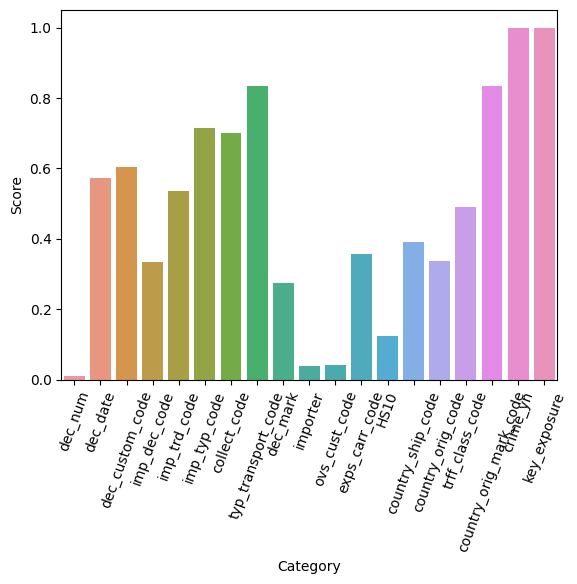

In [10]:
sns.barplot(x='Category',y ='Score', data = CC_score[CC_score['Score'] > 0])
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

### 수치형 타입  데이터 커버리지 확인

In [11]:
from sdmetrics.single_column import RangeCoverage

RangeCoverage.compute(
    real_data=copy_base['trff_rate'],
    synthetic_data=copy_syn['trff_rate']
)

0.5001988598700783

### 수치형 타입의 항목별 커버리지 그래프 그리기

In [12]:
from sdmetrics.single_column import RangeCoverage
RC_score = pd.DataFrame({})

RC_score = pd.DataFrame({'Category':[],'Score':[]})
Range_columns = ['trff_rate','dec_weight','taxabal_price_KRW']

for idx,val in enumerate(copy_base):
    score = 0 
    if val in Range_columns:
        score = RangeCoverage.compute(
            real_data=copy_base[val],
            synthetic_data=copy_syn[val]
        )
    RC_score.loc[idx] = [val,score]

In [13]:
import matplotlib.font_manager as fm 
plt.rcParams['font.family'] = 'Malgun Gothic'

(array([0, 1, 2]),
 [Text(0, 0, 'trff_rate'),
  Text(1, 0, 'dec_weight'),
  Text(2, 0, 'taxabal_price_KRW')])

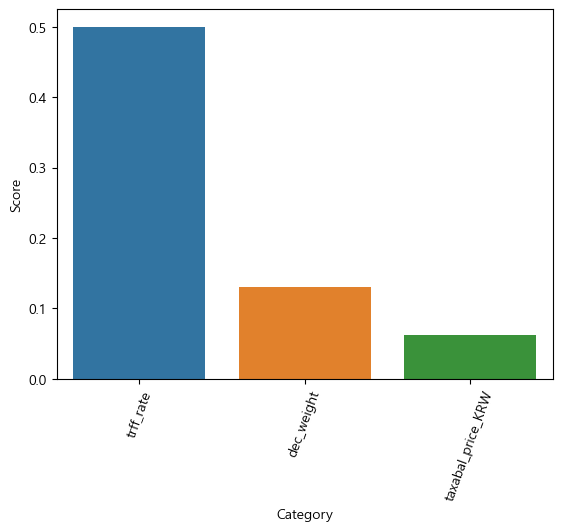

In [14]:
sns.barplot(x='Category',y ='Score', data = RC_score[RC_score['Score'] > 0])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

## 결과 통합하기

In [17]:
CC_score.loc[[15,18,19],'Score'] = RC_score.loc[[15,18,19],'Score']

In [18]:
Total_score = CC_score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'dec_num'),
  Text(1, 0, 'dec_date'),
  Text(2, 0, 'dec_custom_code'),
  Text(3, 0, 'imp_dec_code'),
  Text(4, 0, 'imp_trd_code'),
  Text(5, 0, 'imp_typ_code'),
  Text(6, 0, 'collect_code'),
  Text(7, 0, 'typ_transport_code'),
  Text(8, 0, 'dec_mark'),
  Text(9, 0, 'importer'),
  Text(10, 0, 'ovs_cust_code'),
  Text(11, 0, 'exps_carr_code'),
  Text(12, 0, 'HS10'),
  Text(13, 0, 'country_ship_code'),
  Text(14, 0, 'country_orig_code'),
  Text(15, 0, 'trff_rate'),
  Text(16, 0, 'trff_class_code'),
  Text(17, 0, 'country_orig_mark_code'),
  Text(18, 0, 'dec_weight'),
  Text(19, 0, 'taxabal_price_KRW'),
  Text(20, 0, 'crime_yn'),
  Text(21, 0, 'key_exposure')])

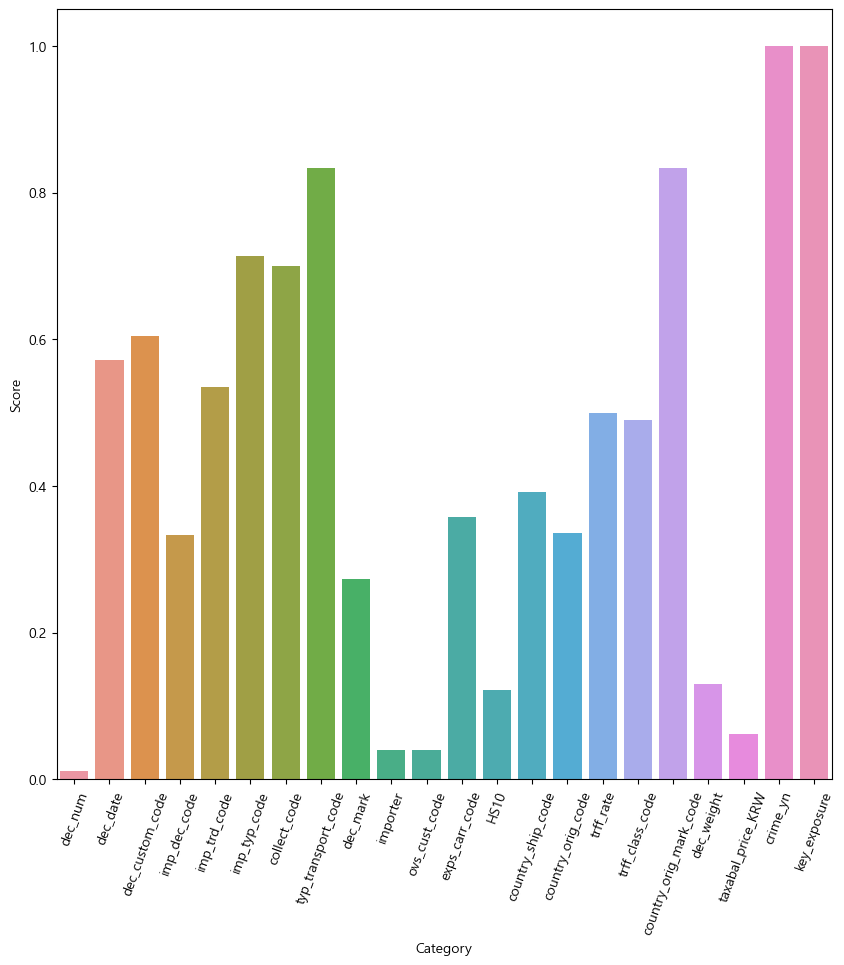

In [19]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('Greys', 1)
sns.barplot(x='Category',y ='Score', data = Total_score[Total_score['Score'] > 0])
plt.rcParams['font.family'] = 'NanumSquare'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)